# Script to visualize predictions of a Model
Utilized to create single figures for the Beleg

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import keras.backend as K
import os

Using TensorFlow backend.
/home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/julien/anaconda3/

## Custom Loss Function needed to allow loading of Model

In [2]:
def Masked_Mean_Absolute_Error(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Mean_Absolute_Error_Sigmoid(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Mean_Absolute_Error_Simple(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            ) 
    return loss


def Masked_Mean_Absolute_Error_Simple_Sigmoid(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            ) 
    return loss


def Masked_Root_Mean_Squared_Error(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Root_Mean_Squared_Error_Sigmoid(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Root_Mean_Squared_Error_Simple(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            ) 
    return loss


def Masked_Root_Mean_Squared_Error_Simple_Sigmoid(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            ) 
    return loss


def berHu(c):
    '''Reverse Huber loss as stated in paper "Deeper Depth Prediction with Fully Convolutional Residual Networks" by Laina et al. and "The berhu
       penalty and the grouped effect" by L. Zwald and S. Lambert-Lacroix'''
    # does this current implementation makes sense? --> yes, it returns mae or mse
    # TODO implement this with binary mask too?
    def inverse_huber(y_true, y_pred):
        threshold = c * K.max(K.abs(y_true - y_pred))
        absolute_mean = K.mean(K.abs(y_true - y_pred))
        mask = K.less_equal(absolute_mean, threshold)
        mask = K.cast(mask, dtype='float32')
        return mask * absolute_mean + (1-mask) * K.mean(K.square(K.abs(y_true - y_pred)))
    return inverse_huber

## Different Path Variables

In [3]:
path_model = os.path.join('/media', 'julien', 'Transcend', 'Beleg', 'models_second_tests', 'model_sgd_100_MMAE_simple_momentum_nesterov.h5')
path_images = 'Images/Images'

## Load the Models to Visualize

In [4]:
#model_mmae = load_model(os.path.join(path_models, 'model_sgd_100_MMAE.h5'), custom_objects={'Masked_Mean_Absolute_Error':Masked_Mean_Absolute_Error, 'Masked_Root_Mean_Squared_Error':Masked_Root_Mean_Squared_Error, 'inverse_huber':berHu(0.2)})
#model_mmae = load_model(os.path.join(path_models, 'model_bmae.h5'), custom_objects={'Binary_Mean_Absolut_Error': Masked_Mean_Absolute_Error})

model = load_model(path_model, custom_objects={'Masked_Mean_Absolute_Error':Masked_Mean_Absolute_Error,
                                                        'Masked_Mean_Absolute_Error_Simple':Masked_Mean_Absolute_Error_Simple, 
                                                        'Masked_Mean_Absolute_Error_Simple_Sigmoid':Masked_Mean_Absolute_Error_Simple_Sigmoid,
                                                        'Masked_Mean_Absolute_Error_Sigmoid':Masked_Mean_Absolute_Error_Sigmoid,
                                                        'Masked_Root_Mean_Squared_Error':Masked_Root_Mean_Squared_Error,
                                                        'Masked_Root_Mean_Squared_Error_Simple':Masked_Root_Mean_Squared_Error_Simple,
                                                        'Masked_Root_Mean_Squared_Error_Simple_Sigmoid':Masked_Root_Mean_Squared_Error_Simple_Sigmoid,
                                                        'Masked_Root_Mean_Squared_Error_Sigmoid':Masked_Root_Mean_Squared_Error_Sigmoid,
                                                        'inverse_huber':berHu(0.2)})

W1130 01:08:59.565456 140630971062080 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1130 01:08:59.669444 140630971062080 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1130 01:08:59.693501 140630971062080 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 01:08:59.694101 140630971062080 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is depre

## Load the images

In [22]:
color = cv2.imread(os.path.join(path_images, '15_color_val.jpg'), cv2.IMREAD_COLOR)
#color = np.ones((480,640,3), dtype=np.uint8) * 255
depth = cv2.imread(os.path.join(path_images, '15_depth_val.png'), cv2.IMREAD_ANYDEPTH)
ir = cv2.imread(os.path.join(path_images, '15_infrared_val.png'), cv2.IMREAD_ANYDEPTH)

img_c = (color/255.).astype(np.float32).reshape(1,480,640,3)
img_ir = (ir/65535.).astype(np.float32).reshape(1,480,640,1)

print('Color: ' + str(color.shape) + ' ' + str(color.dtype))
print('Rescaled Color: ' + str(img_c.shape) + ' ' + str(img_c.dtype))
print('Infrared: ' + str(ir.shape) + ' ' + str(ir.dtype))
print('Rescaled Infrared: ' + str(img_ir.shape) + ' ' + str(img_ir.dtype))
print('Depth: ' + str(depth.shape) + ' ' + str(depth.dtype))

Color: (480, 640, 3) uint8
Rescaled Color: (1, 480, 640, 3) float32
Infrared: (480, 640) uint16
Rescaled Infrared: (1, 480, 640, 1) float32
Depth: (480, 640) uint16


## Predict the Depth with each of the Models

In [23]:
#pred_mae = model_mae.predict([img_c, img_ir])
#pred_mmae = model_mmae.predict([img_c, img_ir])
pred_mmae = model.predict([img_c, img_ir])
#print('Prediction MAE: ' + str(pred_mae.shape) + ' ' + str(pred_mae.dtype))
print('Prediction MMAE: ' + str(pred_mmae.shape) + ' ' + str(pred_mmae.dtype))
#print('Prediction: ' + str(pred.shape) + ' ' + str(pred.dtype))

Prediction MMAE: (1, 480, 640, 1) float32


## Print Min and Max Values from Predictions and Ground Truth

In [19]:
#print('Prediction MAE Max / Min: ' + str(np.amax(pred_mae)) + ' / ' + str(np.amin(pred_mae)))
print('Prediction MMAE Max / Min: ' + str(np.amax(pred_mmae)) + ' / ' + str(np.amin(pred_mmae)))
print('Ground Truth Max / Min: ' + str(np.amax(depth)) + ' / ' + str(np.amin(depth)))

Prediction MMAE Max / Min: 9981.121 / 1843.2242
Ground Truth Max / Min: 10018 / 0


## Transform to uint16 and Print Values again

In [20]:
#mae = np.clip(pred_mae, 0, 65535)
#mae = mae.astype(np.uint16).reshape(480,640)
mmae = np.clip(pred_mmae, 0, 65535)
mmae = pred_mmae.astype(np.uint16).reshape(480,640)
#mmae[mmae>14000]=0

#print('Prediction MAE Max / Min: ' + str(np.amax(mae)) + ' / ' + str(np.amin(mae)))
print('Prediction MMAE Max / Min: ' + str(np.amax(mmae)) + ' / ' + str(np.amin(mmae)))
print('Ground Truth Max / Min: ' + str(np.amax(depth)) + ' / ' + str(np.amin(depth)))

Prediction MMAE Max / Min: 9981 / 1843
Ground Truth Max / Min: 10018 / 0


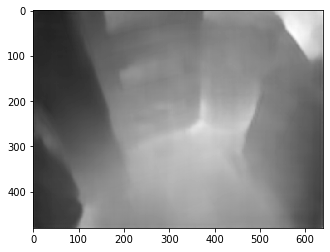

W1130 01:17:52.053734 140630971062080 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


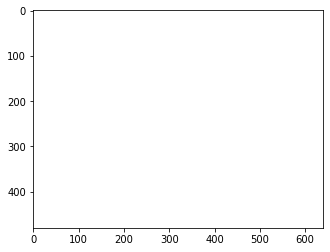

In [21]:
%matplotlib inline
plt.imshow(mmae, cmap="gray")
plt.show()
plt.imshow((img_c * 255).reshape(480,640,3))
plt.show()

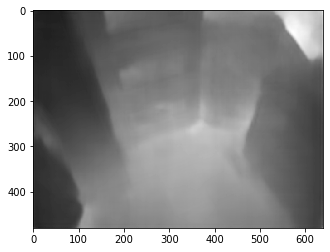

In [9]:
%matplotlib inline
plt.imshow(mmae, cmap="gray")
plt.show()

Ground Truth


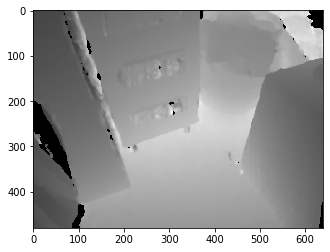

MMAE


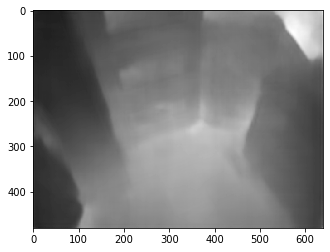

MMAE edited


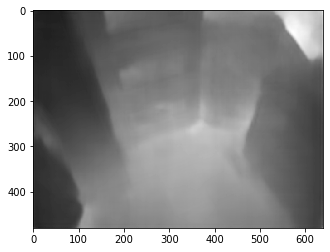

In [76]:
%matplotlib inline
print('Ground Truth')
plt.imshow(depth, cmap="gray")
plt.show()
#print('MAE')
#plt.imshow(mae, cmap="gray")
#plt.show()
print('MMAE')
plt.imshow(mmae, cmap="gray")
plt.show()
mmae_edited = mmae.copy()
mmae_edited[mmae_edited>15000] = 0
print('MMAE edited')
plt.imshow(mmae_edited, cmap="gray")
plt.show()

## Save Results

In [69]:
cv2.imwrite(os.path.join(path_images, 'val_2_pred_mae.png'), mae)
cv2.imwrite(os.path.join(path_images, 'val_2_pred_mmae.png'), mmae)
cv2.imwrite(os.path.join(path_images, 'val_2_pred_mmae_edited.png'), mmae_edited)

True

## Normalize Predictions and Ground Truth for later Colorization

In [77]:
#norm_depth = np.zeros(shape=depth.shape, dtype=np.uint16)
#norm_mae = np.zeros(shape=mae.shape, dtype=np.uint16)
#norm_mmae = np.zeros(shape=mmae.shape, dtype=np.uint16)
#norm_mmae_edited = np.zeros(shape=mmae_edited.shape, dtype=np.uint16)

norm_depth = cv2.normalize(depth, None, 0, 65535, cv2.NORM_MINMAX)
#norm_mae = cv2.normalize(mae, None, 0, 65535, cv2.NORM_MINMAX)
norm_mmae = cv2.normalize(mmae, None, 0, 65535, cv2.NORM_MINMAX)
norm_mmae_edited = cv2.normalize(mmae_edited, None, 0, 65535, cv2.NORM_MINMAX)

### Visualize Normalization

Ground Truth


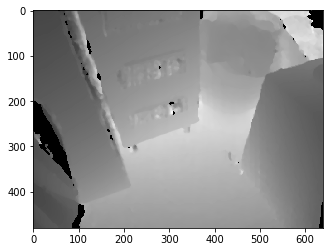

MMAE


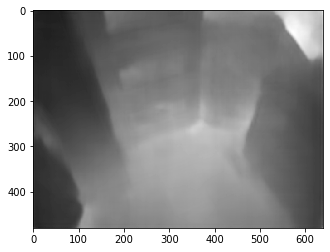

MMAE edited


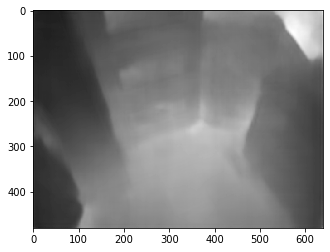

In [78]:
%matplotlib inline
print('Ground Truth')
plt.imshow(norm_depth, cmap="gray")
plt.show()
#print('MAE')
#plt.imshow(norm_mae, cmap="gray")
#plt.show()
print('MMAE')
plt.imshow(norm_mmae, cmap="gray")
plt.show()
print('MMAE edited')
plt.imshow(norm_mmae_edited, cmap="gray")
plt.show()

In [79]:
cv2.imwrite(os.path.join(path_images, '15_ground_normalized_val.png'), norm_depth)
cv2.imwrite(os.path.join(path_images, '15_pred_normalized_val.png'), norm_mmae_edited)

True

## Stack images into one image

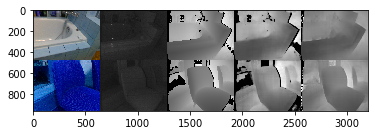

True

In [41]:
%matplotlib inline

# load already computed images
g_color = cv2.imread(os.path.join(path_images, 'buffer', '5143_color.jpg'), cv2.IMREAD_COLOR)
g_ir = cv2.imread(os.path.join(path_images, 'buffer', '5143_infrared.png'), cv2.IMREAD_ANYDEPTH)
g_ir = cv2.cvtColor((g_ir/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
n_depth = cv2.imread(os.path.join(path_images, 'buffer', 'train_norm_pred_depth.png'), cv2.IMREAD_ANYDEPTH)
n_depth = cv2.cvtColor((n_depth/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
n_mae = cv2.imread(os.path.join(path_images, 'buffer', 'train_norm_pred_mae.png'), cv2.IMREAD_ANYDEPTH)
n_mae = cv2.cvtColor((n_mae/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
n_mmae_edited = cv2.imread(os.path.join(path_images, 'buffer', 'train_norm_pred_mmae_edited.png'), cv2.IMREAD_ANYDEPTH)
n_mmae_edited = cv2.cvtColor((n_mmae_edited/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)

ir_col = cv2.cvtColor((ir/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
depth_col = cv2.cvtColor((norm_depth/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
mae_col = cv2.cvtColor((norm_mae/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
mmae_edited_col = cv2.cvtColor((norm_mmae_edited/256).astype(np.uint8), cv2.COLOR_GRAY2RGB)
overview = np.concatenate((color, ir_col, depth_col, mae_col, mmae_edited_col), axis=1) # , norm_depth, norm_mae, norm_mmae_edited
overview2 = np.concatenate((g_color, g_ir, n_depth, n_mae, n_mmae_edited), axis=1)
result = np.concatenate((overview, overview2), axis=0)
plt.imshow(result)
plt.show()
cv2.imwrite(os.path.join(path_images, 'combination_result.png'), result)

## Save normalized images

In [91]:
cv2.imwrite(os.path.join(path_images, 'train_norm_pred_mae.png'), norm_mae)
cv2.imwrite(os.path.join(path_images, 'train_norm_pred_mmae.png'), norm_mmae)
cv2.imwrite(os.path.join(path_images, 'train_norm_pred_mmae_edited.png'), norm_mmae_edited)
cv2.imwrite(os.path.join(path_images, 'train_norm_pred_depth.png'), norm_depth)

True

## Colorize Depth Predictions and Ground Truth

In [77]:
color_depth = cv2.applyColorMap((norm_depth/256).astype(np.uint8), 2)
color_mae = cv2.applyColorMap((norm_mae/256).astype(np.uint8), 2)
color_mmae = cv2.applyColorMap((norm_mmae/256).astype(np.uint8), 2)
color_mmae_edited = cv2.applyColorMap((norm_mmae_edited/256).astype(np.uint8), 2)

Ground Truth


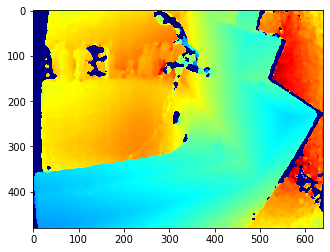

MAE


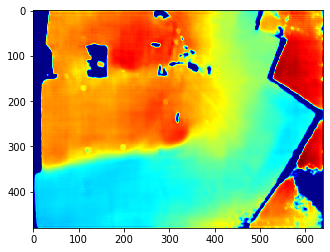

MMAE Edited


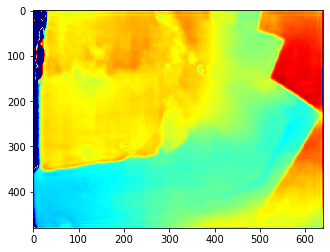

MMAE


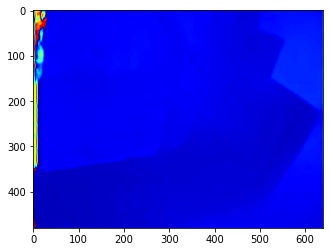

In [79]:
%matplotlib inline
print('Ground Truth')
plt.imshow(cv2.cvtColor(color_depth, cv2.COLOR_BGR2RGB))
plt.show()
print('MAE')
plt.imshow(cv2.cvtColor(color_mae, cv2.COLOR_BGR2RGB))
plt.show()
print('MMAE Edited')
plt.imshow(cv2.cvtColor(color_mmae_edited, cv2.COLOR_BGR2RGB))
plt.show()
print('MMAE')
plt.imshow(cv2.cvtColor(color_mmae, cv2.COLOR_BGR2RGB))
plt.show()